### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Getting our Data

p1-customers.xlsx - This dataset includes the following information on about 2,300 customers.

p1-mailinglist.xlsx - This dataset is the 250 customers that you need to predict sales. This is the list of customers that the company would send a catalog to. 


In [5]:
customers = pd.read_excel('p1-customers.xlsx')
mail_list = pd.read_excel("p1-mailinglist.xlsx")

### Checking the head of our Data, its info() and describe() methods to better understand it.

In [6]:
customers.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [8]:
mail_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2375 non-null   object 
 1   Customer_Segment            2375 non-null   object 
 2   Customer_ID                 2375 non-null   int64  
 3   Address                     2375 non-null   object 
 4   City                        2375 non-null   object 
 5   State                       2375 non-null   object 
 6   ZIP                         2375 non-null   int64  
 7   Avg_Sale_Amount             2375 non-null   float64
 8   Store_Number                2375 non-null   int64  
 9   Responded_to_Last_Catalog   2375 non-null   object 
 10  Avg_Num_Products_Purchased  2375 non-null   int64  
 11  Years_as_Customer           2375 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 167.1+ KB


In [10]:
mail_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        250 non-null    object 
 1   Customer_Segment            250 non-null    object 
 2   Customer_ID                 250 non-null    int64  
 3   Address                     250 non-null    object 
 4   City                        250 non-null    object 
 5   State                       250 non-null    object 
 6   ZIP                         250 non-null    int64  
 7   Store_Number                250 non-null    int64  
 8   Avg_Num_Products_Purchased  250 non-null    int64  
 9   Years_as_Customer           250 non-null    float64
 10  Score_No                    250 non-null    float64
 11  Score_Yes                   250 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 18.6+ KB


In [11]:
customers.describe()

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,1647.845474,80123.333474,399.774093,104.297684,3.347368,4.500632
std,962.728105,107.255770,340.115808,2.837240,2.738568,2.309986
min,2.000000,80002.000000,1.220000,100.000000,1.000000,1.000000
25%,820.500000,80014.000000,168.925000,101.000000,1.000000,2.000000
50%,1629.000000,80123.000000,281.320000,105.000000,3.000000,5.000000
75%,2492.500000,80221.000000,572.400000,107.000000,5.000000,6.000000
max,3335.000000,80640.000000,2963.490000,109.000000,26.000000,8.000000


In [13]:
mail_list.describe()

,Customer_ID,ZIP,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer,Score_No,Score_Yes
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1764.148000,80117.780000,104.396000,4.672000,0.550400,0.659332,0.340668
std,943.734953,102.345797,2.612755,2.752949,0.302367,0.190043,0.190044
min,18.000000,80002.000000,100.000000,1.000000,0.000000,0.000002,0.185729
25%,949.250000,80014.000000,102.000000,3.000000,0.300000,0.612926,0.210961
50%,1882.000000,80121.000000,105.000000,5.000000,0.600000,0.742010,0.257990
75%,2499.500000,80219.750000,106.000000,6.000000,0.800000,0.789039,0.387074
max,3328.000000,80401.000000,109.000000,27.000000,1.000000,0.814271,0.999998


### EDA: Exploring Variables that can properly predict Avg_Sale_Amount in Customer data
#### using sns.pairplot function, we will plot pairwise relationship between every numeric columns in the Customer Data


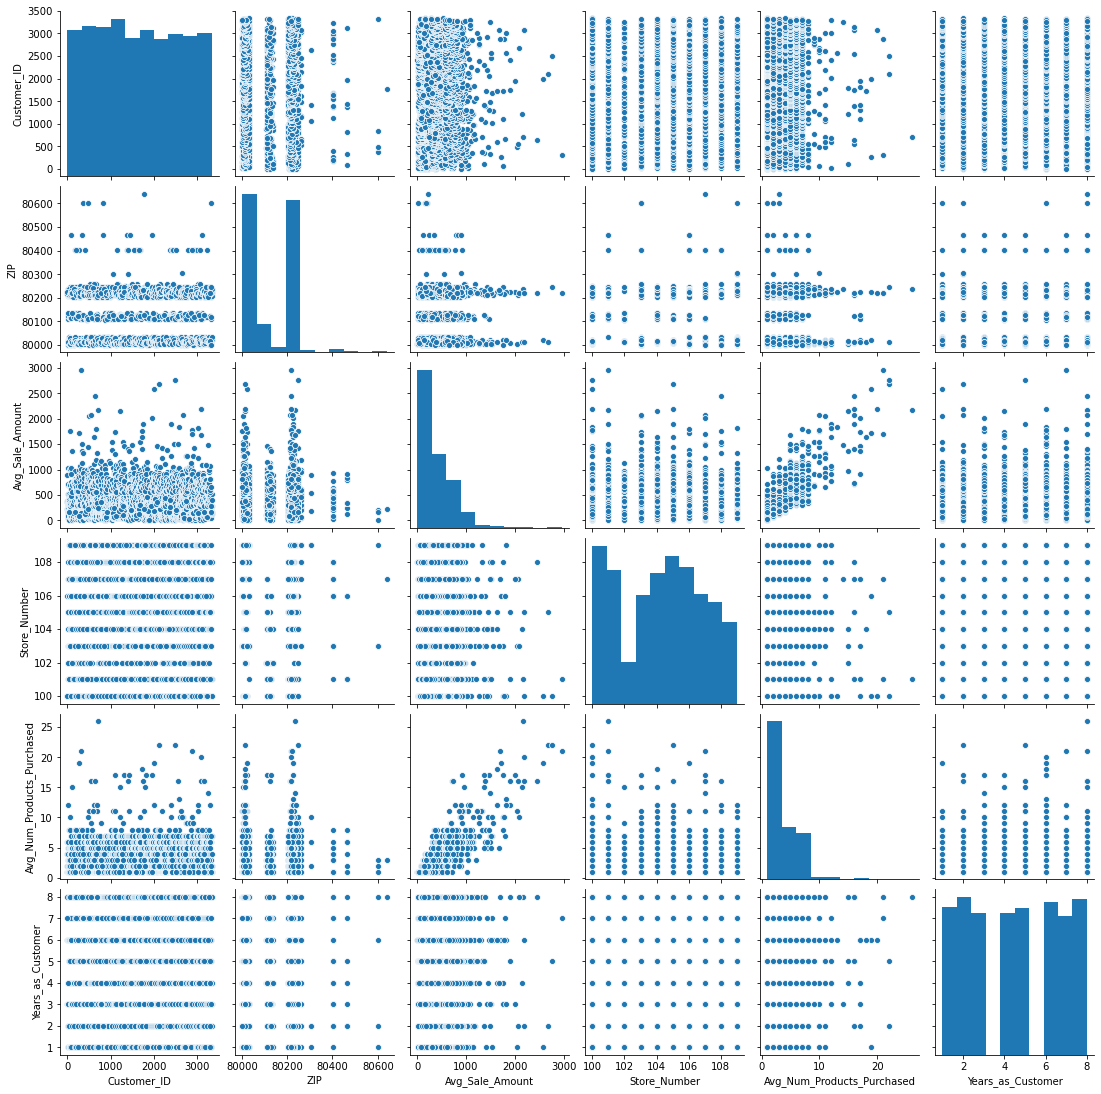

In [14]:
sns.pairplot(customers)

#### reviewing the above plots, we can see visually that Avg_Num_Producst_Purchased highly correlates with Avg_Sale_Amount

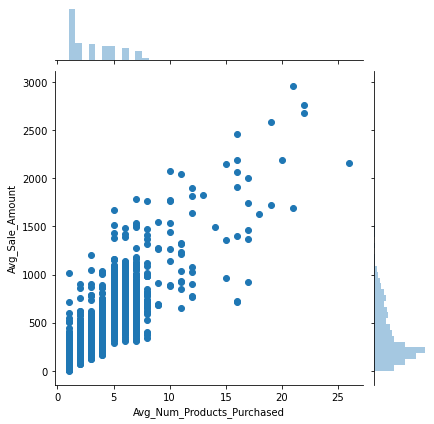

In [52]:
sns.jointplot(data=customers, x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount')

### There's a theory that Customer Segment correlates with Avg_Sale_Amount, but we can't assess the relationship between both variables cause  Customer Segment is a categorical Variable. So we are going to convert it into dummy variable

##### There are four Unique values in the Customer_Segment Column

In [16]:
customers['Customer_Segment'].nunique()

4

#### Converting the Customer Segment column into a dummy

In [17]:
customers = pd.get_dummies(customers, columns=['Customer_Segment'])

#### Prepping the Customer Data for Regression

In [20]:
#Target Variable

Y = customers.Avg_Sale_Amount

In [24]:
#Predictor Variables

X = customers.drop(["Avg_Sale_Amount","Name","Customer_ID","Address","City","State","ZIP","Store_Number","Responded_to_Last_Catalog","Years_as_Customer"], axis=1)

In [53]:
X.head()

,Avg_Num_Products_Purchased,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


### Training the Model
Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [26]:
from sklearn import linear_model

**Create an instance of a LinearRegression() model named Model.**

In [27]:
model = linear_model.LinearRegression()

** Train/fit model on the training data.**

In [28]:
model.fit(X,Y)

LinearRegression()

**Printing out the coefficients of the model**


The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [30]:
coeffecients = pd.DataFrame(model.coef_, X.columns, columns=['Coeffecient'])
coeffecients

,Coeffecient
Avg_Num_Products_Purchased,6.800207e+01
Customer_Segment_Credit Card Only,3.639361e+14
Customer_Segment_Loyalty Club Only,3.639361e+14
Customer_Segment_Loyalty Club and Credit Card,3.639361e+14
Customer_Segment_Store Mailing List,3.639361e+14


#### Printing out the Intercept

In [32]:
model.intercept_

-363936083928003.94

#### Prepping our Test_Data (Mail_List)

In [33]:
mail_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


#### Converting the Customer Segment column into a dummy

In [34]:
mail_list = pd.get_dummies(mail_list, columns=['Customer_Segment'])

In [35]:
mail_list.head()

,Name,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer,Score_No,Score_Yes,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,A Giametti,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0
1,Abby Pierson,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0
2,Adele Hallman,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0
3,Alejandra Baird,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0
4,Alice Dewitt,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0


In [37]:
mail_test = mail_list.drop(["Name","Customer_ID","Address","City","State","ZIP","Store_Number","Score_No","Score_Yes","Years_as_Customer"], axis=1)

In [38]:
mail_test.head()

,Avg_Num_Products_Purchased,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,3,0,1,0,0
1,6,0,0,1,0
2,7,0,1,0,0
3,2,0,1,0,0
4,4,0,1,0,0


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Using model.predict() to predict off the mail_test set of the data.**

In [39]:
Predicted_Profit = model.predict(mail_test)

#### Adding the prediction to the original mailing list Data

In [41]:
mail_list['predicted_profit'] = Predicted_Profit


In [42]:
mail_list.head()

,Name,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer,Score_No,Score_Yes,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,predicted_profit
0,A Giametti,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,355.75
1,Abby Pierson,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,989.75
2,Adele Hallman,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,627.75
3,Alejandra Baird,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,287.75
4,Alice Dewitt,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,423.75


#### Applying the business rule of multiplying the predicted profit by score_yes i.e. the probability that customer will respond to catalog

Score_Yes: The probability that the customer WILL respond to the catalog and make a purchase.

Hint: We want to calculate the expected revenue from these 250 people in order to get expected profit. This means we need to multiply the probability that a person will buy our catalog as well. For example, if a customer were to buy from us, we predict this customer will buy 450 dollars worth of products. At a 30 percent chance that this person will actually buy from us, we can expect revenue to be 450 x 30% = $135."

In [57]:
mail_list['expected_revenue'] = mail_list['predicted_profit'] * mail_list['Score_Yes']

In [58]:
mail_list.head()

,Name,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,Years_as_Customer,Score_No,Score_Yes,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List,predicted_profit,expected_revenue
0,A Giametti,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,355.75,108.516488
1,Abby Pierson,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,989.75,467.879110
2,Adele Hallman,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,627.75,363.393081
3,Alejandra Baird,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,287.75,87.803405
4,Alice Dewitt,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,423.75,164.290356


#### Taking the sum of all expected_Revenue for all the customers in the mailing list

In [59]:
Sum_Expected_Revenue = mail_list['expected_revenue'].sum() 

In [60]:
Sum_Expected_Revenue

47345.13550233919

#### Calculating FInal Profit for all catalog for every customer in the mailing list

cost for printing all the catalog is 6.5 * 250 
The average gross margin (price - cost) on all products sold through the catalog is 50%.

In [61]:
Profit = (Sum_Expected_Revenue * 0.5) - (6.5 * 250)

##### Profit Predicted (22,047) is the money the company can expect to earn from sending out a catalog to new customers and it exceeds the 10,000$ limit set by the business, with this information we can recommend Management to proceed to sending out the catalog to the new 250 customers.

In [63]:
Profit

22047.567751169594